In [20]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
# Apply metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    precision_score, recall_score, roc_auc_score
)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [21]:
# load dataset
df = pd.read_csv('data/processed-data.csv')
df = pd.get_dummies(df, columns=['ph', 'rainfall'])

# split the dataframe into features (x) and labels (y)
x = df.drop(columns = ['label'])
y = df['label']

In [22]:
# split the data to 90-10 where 90% is for training and testing while the remaining 10% is for unseen data
x_train_test, x_unseen, y_train_test, y_unseen = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [23]:
# instantiate the model
model = svm.SVC(kernel='poly', degree=3, C=1.0, gamma='scale', decision_function_shape='ovr', probability=True)

# instantiate a 10-fold cross-validation
sp = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

In [24]:

metrics = ['accuracy', 'precision_macro', 'recall_macro', 'roc_auc_ovr']

# perform cross-validation and obtain the metrics
metrics_results = cross_validate(model, x_train_test, y_train_test, cv = sp, scoring = metrics, return_estimator = True)

In [25]:
conf_matrices = []

for estimator, (_, test_index) in zip(metrics_results['estimator'], sp.split(x_train_test, y_train_test)):
    # predict using the test set
    y_pred = estimator.predict(x_train_test.iloc[test_index])

    # compute the confusion matrix for this iteration
    conf_matrix = confusion_matrix(y_train_test.iloc[test_index], y_pred)

    # append the matrix to the list
    conf_matrices.append(conf_matrix)

# compute the average confusion matrix
conf_matrix_avg = np.mean(conf_matrices, axis = 0)

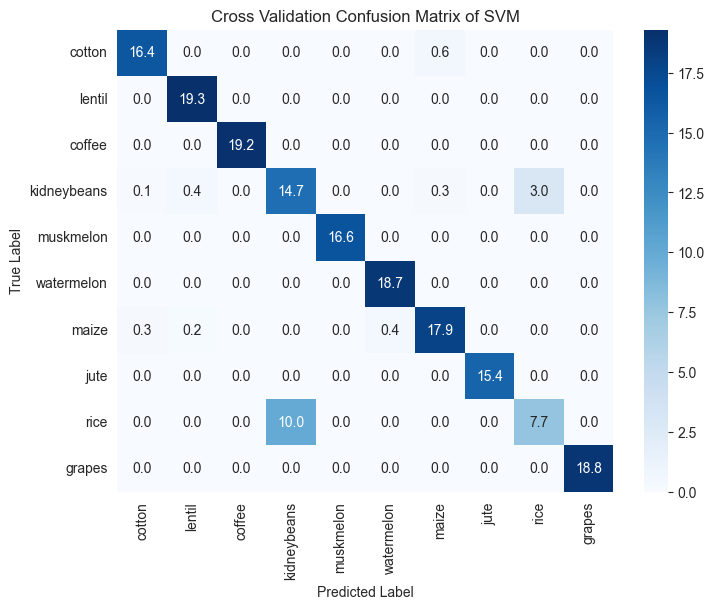

In [40]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_avg, annot=True, fmt=".1f", cmap="Blues", xticklabels=y_train_test.unique(), yticklabels=y_train_test.unique())

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Cross Validation Confusion Matrix of SVM")
plt.show()

In [27]:
# Print Results
print('\nCross-Validation Evaluation Results:')
# print('Confusion Matrix: \n', conf_matrix_avg)
print(f'Accuracy: {metrics_results["test_accuracy"].mean():.4f}')
print(f'Precision: {metrics_results["test_precision_macro"].mean():.4f}')
print(f'Recall: {metrics_results["test_recall_macro"].mean():.4f}')
print(f'ROC AUC: {metrics_results["test_roc_auc_ovr"].mean():.4f}')


Cross-Validation Evaluation Results:
Accuracy: 0.9150
Precision: 0.9196
Recall: 0.9143
ROC AUC: 0.9928


In [28]:
# Train now the data based on 90% since it will be the basis on how it will behave for unseen data
model.fit(x_train_test, y_train_test)

SVC(kernel='poly', probability=True)

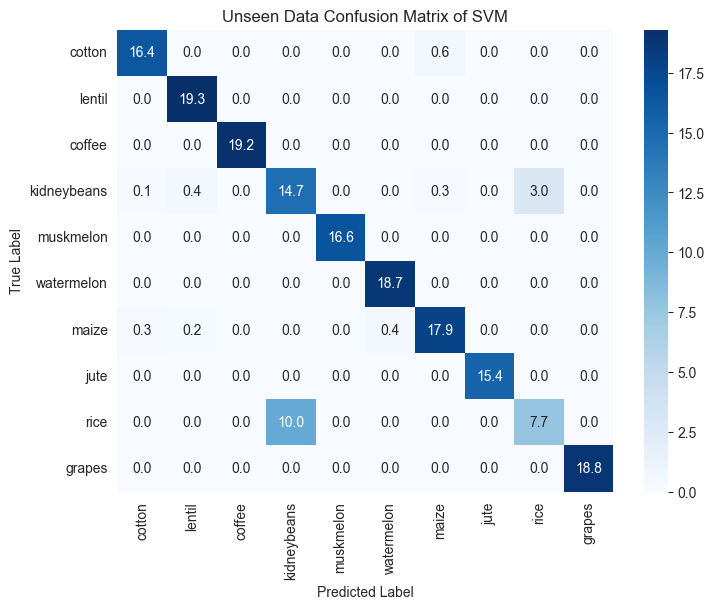

In [41]:
# Test now the model based on the actual data (unseen na 10%)

y_unseen_pred = model.predict(x_unseen)

conf_matrix = confusion_matrix(y_unseen, y_unseen_pred)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_avg, annot=True, fmt=".1f", cmap="Blues", xticklabels=y_train_test.unique(), yticklabels=y_train_test.unique())

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Unseen Data Confusion Matrix of SVM")
plt.show()

In [29]:
# Print Results
print('\nUnseen Data Evaluation Results:')
accuracy = accuracy_score(y_unseen, y_unseen_pred)
precision = precision_score(y_unseen, y_unseen_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_unseen, y_unseen_pred, average='weighted')
roc_auc = roc_auc_score(y_unseen, model.predict_proba(x_unseen), multi_class='ovr')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


Unseen Data Evaluation Results:
Accuracy: 0.9300
Precision: 0.9452
Recall: 0.9300
ROC AUC: 0.9965
